In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta


nifty = yf.download("^BSESN", start="1997-01-01", end="2024-12-31")

election_dates = [
   "1997-11-04", "2000-11-07", "2004-11-02", "2008-11-04", "2012-11-06", "2016-11-08", "2020-11-03"
]

[*********************100%***********************]  1 of 1 completed


In [2]:
# U.S. Presidents and their terms (mapping election year to president and their term)
presidents = {
    1997: ("Bill Clinton", "Second Term"),
    2000: ("George W. Bush", "First Term"),
    2004: ("George W. Bush", "Second Term"),
    2008: ("Barack Obama", "First Term"),
    2012: ("Barack Obama", "Second Term"),
    2016: ("Donald Trump", "First Term"),
    2020: ("Joe Biden", "First Term")
}


election_dates = [datetime.strptime(date, "%Y-%m-%d") for date in election_dates]
results = []

In [3]:
for election_date in election_dates:
    election_year = election_date.year
    
    if election_date in nifty.index:
        next_day = election_date + pd.Timedelta(days=1)
        
        if next_day in nifty.index:
            election_close = nifty.loc[election_date, 'Close']
            next_day_close = nifty.loc[next_day, 'Close']
            next_day_high = nifty.loc[next_day, 'High']
            next_day_low = nifty.loc[next_day, 'Low']
            
            
            next_day_percent_return = round(((next_day_close - election_close) / election_close) * 100, 2)
            next_day_percent_range = round(((next_day_high - next_day_low) / next_day_close) * 100, 2)
            
            future_dates = {
                "3 Months": election_date + timedelta(days=90),
                "1 Year": election_date + timedelta(days=365),
            }
            
            future_returns = {}
            
            for period, future_date in future_dates.items():
                if future_date in nifty.index:
                    future_close = nifty.loc[future_date, 'Close']
                    percent_return = round(((future_close - election_close) / election_close) * 100, 2)
                    future_returns[period] = percent_return
                else:
                    future_returns[period] = None  # If data is not available for the future date
            
            president, term = presidents.get(election_year, ("Unknown", "Unknown"))
            
            results.append({
                "Election Date": election_date.strftime('%Y-%m-%d'),
                "President": president,
                "Term": term,
                "Next Day % Return": next_day_percent_return,
                "Next Day % Range": next_day_percent_range,
                "3 Months Return (%)": future_returns.get("3 Months", None),
                "1 Year Return (%)": future_returns.get("1 Year", None),
            })


results_df = pd.DataFrame(results)

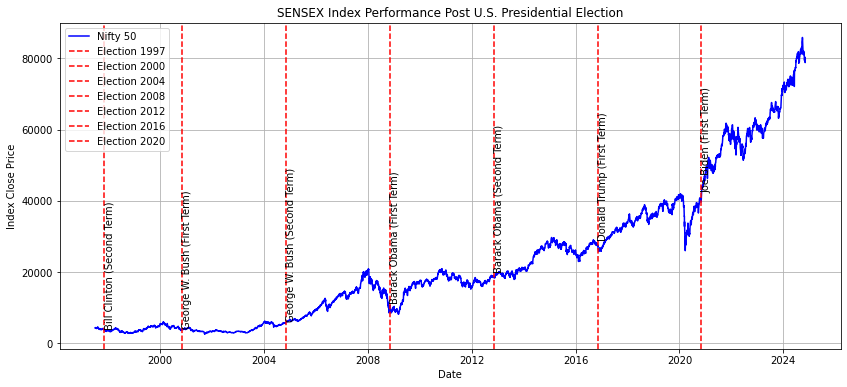

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(nifty['Close'], label="Nifty 50", color='blue')

for i, date in enumerate(election_dates):
    
    president_info = results_df.iloc[i]['President'] + " (" + results_df.iloc[i]['Term'] + ")"
    plt.axvline(x=date, color='red', linestyle='--', label=f'Election {date.strftime("%Y")}')
    plt.text(date, nifty['Close'][date] * 1.05, president_info, rotation=90, verticalalignment='bottom', horizontalalignment='left', fontsize=10)


    plt.title("SENSEX Index Performance Post U.S. Presidential Election")
plt.xlabel("Date")
plt.ylabel("Index Close Price")
plt.legend(loc="upper left")

plt.grid(True)
plt.show()

In [8]:
results_df

,Election Date,President,Term,Next Day % Return,Next Day % Range,3 Months Return (%),1 Year Return (%)
0,1997-11-04,Bill Clinton,Second Term,-0.73,1.28,-11.85,NaN
1,2000-11-07,George W. Bush,First Term,1.87,2.14,10.51,-23.79
2,2004-11-02,George W. Bush,Second Term,1.53,1.26,13.92,40.28
3,2008-11-04,Barack Obama,First Term,-4.81,8.83,-14.72,49.68
4,2012-11-06,Barack Obama,Second Term,0.45,0.99,4.96,11.04
5,2016-11-08,Donald Trump,First Term,-1.23,5.49,3.07,20.40
6,2020-11-03,Joe Biden,First Term,0.88,1.52,20.71,48.46
